This is Regression Task

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression



3.2 For Regression Task [25]:



1. Exploratory Data Analysis and Data Understanding [5]:


1. Choosing a Dataset:


• Select a dataset of your choice that interests you and aligns with one of the United Nations
Sustainable Development Goals (UNSDG).



• Load the dataset into a DataFrame object using the Pandas library.

In [3]:
# Load the dataset into a DataFrame
dataset_path = "/content/drive/MyDrive/asignment/air_quality.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(df.head())


Dataset Loaded Successfully!
   Unnamed: 0  date_local    state_name   county_name      city_name  \
0           0  2018-01-01       Arizona      Maricopa        Buckeye   
1           1  2018-01-01          Ohio       Belmont      Shadyside   
2           2  2018-01-01       Wyoming         Teton  Not in a city   
3           3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4           4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure  arithmetic_mean  aqi  
0  Parts per million         0.473684    7  
1  Parts 

In [4]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

# Display basic statistics of the dataset
print("Basic Statistics of the Dataset:")
print(df.describe())


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        260 non-null    int64  
 1   date_local        260 non-null    object 
 2   state_name        260 non-null    object 
 3   county_name       260 non-null    object 
 4   city_name         260 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    260 non-null    object 
 7   units_of_measure  260 non-null    object 
 8   arithmetic_mean   260 non-null    float64
 9   aqi               260 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.4+ KB
None
Basic Statistics of the Dataset:
       Unnamed: 0  arithmetic_mean         aqi
count  260.000000       260.000000  260.000000
mean   129.500000         0.403169    6.757692
std     75.199734         0.317902    7.061707
min  

In [5]:
# Check for missing values
print("Missing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
Unnamed: 0          0
date_local          0
state_name          0
county_name         0
city_name           0
local_site_name     3
parameter_name      0
units_of_measure    0
arithmetic_mean     0
aqi                 0
dtype: int64


• Perform an initial analysis to gather a detailed description of the dataset. For example:


(a) When and by whom was the dataset created?

Ans=> Yakhyojon Had created this dataset in 2024.


(b) How did you access the dataset?

Ans=> I use dataset from kaggle.com for this task.


(c) How does it align with the chosen UNSDG?

Ans=>This dataset aligns with the United Nations Sustainable Development Goals (UNSDG) by contributing to Goal 3 (Good Health and Well-being) and Goal 13 (Climate Action).





(d) List all the attributes (columns) present in the dataset.

In [6]:
print("Dataset Columns:")
print(df.columns)


Dataset Columns:
Index(['Unnamed: 0', 'date_local', 'state_name', 'county_name', 'city_name',
       'local_site_name', 'parameter_name', 'units_of_measure',
       'arithmetic_mean', 'aqi'],
      dtype='object')


• Identify potential questions that the dataset could help answer.

Ans=>1.What are the average levels of different air pollutants in a specific region over time?
2. How do air pollution levels vary between different seasons or months?
3. What is the relationship between different air pollutants (e.g., PM2.5, PM10, NO2) and health indicators (e.g., respiratory diseases, hospital admissions)?
4. How do weather conditions (e.g., temperature, humidity, wind speed) affect air pollution levels?
5. Can we predict future air quality based on historical data and current weather conditions?


• Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).


Ans=> 1. Data Completeness
Missing Values: Check for missing values in the dataset. If there are many missing values, consider whether they can be filled or if the dataset needs cleaning.

Temporal Coverage: Ensure the dataset covers a sufficient time period for meaningful analysis (e.g., several months or years).

2. Relevance
Alignment with UNSDG: Ensure that the dataset aligns with the chosen UNSDG goal (e.g., Goal 3: Good Health and Well-being) by containing relevant information on air quality and potential health impacts.

Geographic Coverage: Verify that the dataset covers the relevant geographic region(s) for the analysis.

3. Quality
Data Consistency: Check for consistent data formats and units (e.g., pollutant concentrations measured in the same units).

Accuracy: Assess the accuracy of the data sources and measurement methods used.

Granularity: Ensure the dataset has a suitable level of detail (e.g., daily or hourly pollutant measurements).

2. Conducting Exploratory Data Analysis (EDA):


• Understanding the characteristics of the data beforehand is crucial for building a model with
acceptable performance. Before proceeding to build, train, and test the model, write code to
inspect, preview, summarize, explore, and visualize your data. For example:



(a) Perform data cleaning and compute summary statistics for the dataset.


(b) Explore the data through visualizations and charts. Ensure you explain and summarize the
insights gained from each chart.

In [7]:
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Handle missing values for numeric columns by filling with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle missing values for non-numeric columns (example: filling with mode)
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Convert data types if necessary (example: date columns)
# df['date_column'] = pd.to_datetime(df['date_column'])


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
date_local,0
state_name,0
county_name,0
city_name,0
local_site_name,0
parameter_name,0
units_of_measure,0
arithmetic_mean,0
aqi,0


In [9]:
X = df[["arithmetic_mean", "Unnamed: 0"]]
y = df['aqi']


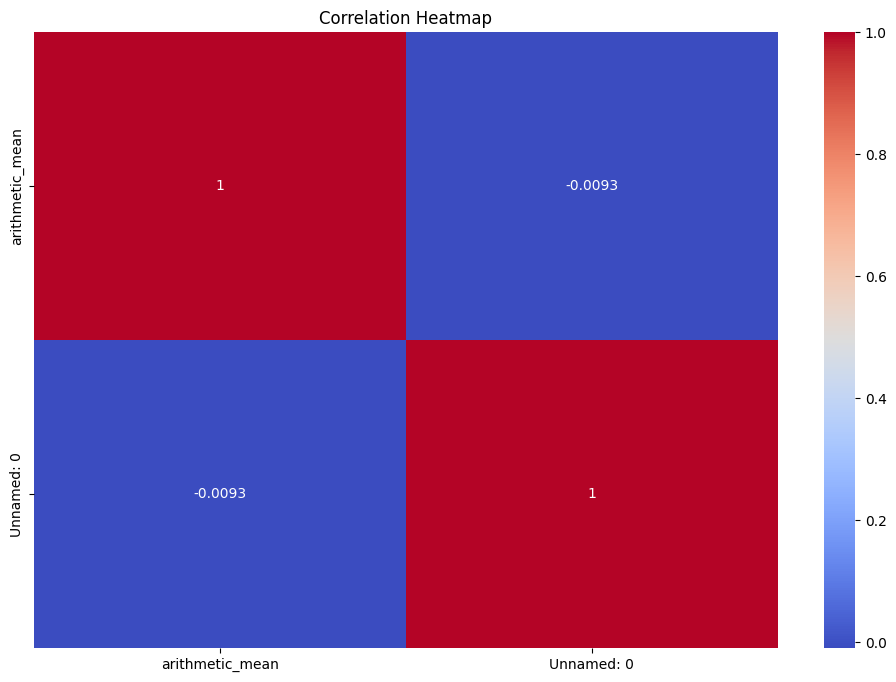

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


2. Build a Model from Scratch [5]:
For the Regression task, build an appropriate model from scratch, such as Linear Regression, and report the
appropriate evaluation metrics on the train and test sets (e.g., Mean Squared Error, R-squared).

In [11]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Normalization
for col in X_train.columns:
    X_train[col] = (X_train[col] - X_train[col].mean()) / X_train[col].std()
    X_test[col] = (X_test[col] - X_test[col].mean()) / X_test[col].std()


In [13]:
X_train

,arithmetic_mean,Unnamed: 0
60,-0.641062,-0.918455
247,-0.776970,1.573990
16,1.125747,-1.504912
55,-0.556119,-0.985098
125,0.954917,-0.052097
...,...,...
20,-0.963845,-1.451598
188,0.463193,0.787604
71,-0.641062,-0.771840
106,2.532967,-0.305340


In [14]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize parameters
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


3. Build a Primary Model [5]:
After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
evaluate your models. Follow the steps below to complete this task:
1. Split the dataset into training and testing sets.
2. Build at least two different machine learning models for the regression task.
3. Evaluate both models on the test dataset using appropriate performance metrics (e.g., Mean
Absolute Error, Root Mean Squared Error, R-squared).
4. Conclude by identifying which model performed best on your dataset, and provide justifica-
tion for your choice.

In [15]:
LR = LinearRegressionScratch(learning_rate=0.01, num_iterations=10)
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
pred

array([ 0.16118711,  0.26180447,  0.25275743,  0.16192126,  0.30404444,
        0.68769334,  0.3875241 ,  0.59470483,  0.35467984,  2.01845568,
        0.26935907,  0.40620515,  0.757714  ,  0.32843523,  0.52530517,
        1.85658885,  0.6059272 ,  0.17737436,  0.96451315,  0.16912099,
        0.01659829,  1.66652316,  0.41503865,  0.45656715,  0.42744225,
        2.01078794,  1.76562065,  0.66514575,  1.46127402,  0.22079567,
        1.02694369,  0.58991738,  0.24395354,  0.53286152,  0.26904134,
        0.12550812, -0.05644472,  0.26260466,  0.38634462,  0.22079556,
        0.45951348,  0.15429065,  3.00952614,  0.75874266,  1.15501201,
        0.34435634,  0.98199707,  0.38314485,  0.44341494,  0.25505007,
        0.31045845,  0.42147533])

In [16]:
mean_squared_error(y_test, pred)

102.18872048444837

In [17]:
r2_score(y_test, pred)

-0.6088214413220714

6. Final Model [2.5]:
Using the optimal hyperparameters identified in Task - 4 and the selected features from Task - 5, rebuild
both models from Task - 3. Evaluate the performance of the final models and provide a summary of your
findings.

In [18]:
# Ridge Regression with GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Decision Tree Regressor with GridSearchCV
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeRegressor(random_state=42)
dt_cv = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_cv.fit(X_train, y_train)

# Evaluate models
ridge_best = ridge_cv.best_estimator_
dt_best = dt_cv.best_estimator_

ridge_pred = ridge_best.predict(X_test)
dt_pred = dt_best.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Ridge MSE: {ridge_mse:.4f}")
print(f"Best Decision Tree params: {dt_cv.best_params_}")
print(f"Decision Tree MSE: {dt_mse:.4f}")


Best Ridge alpha: 0.01
Ridge MSE: 5.6190
Best Decision Tree params: {'max_depth': 3, 'min_samples_split': 2}
Decision Tree MSE: 6.7921


In [19]:
#Feature Selection for Ridge Regression using RFE
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [20]:
X_train_selected = pd.DataFrame(X_train_selected, columns=X_train.columns[selector.get_support()])
X_test_selected = pd.DataFrame(X_test_selected, columns=X_test.columns[selector.get_support()])

In [21]:
ridge_final = Ridge(alpha = 0.01)
ridge_final.fit(X_train_selected, y_train)
ridge_pred_final = ridge_final.predict(X_test_selected)
ridge_mse_final = mean_squared_error(y_test, ridge_pred_final)

In [22]:
ridge_mse_final

5.618953212974

In [23]:
r2_score_final = r2_score(y_test, ridge_pred_final)
r2_score_final

0.9115372776568442

7. Conclusion [2.5]:

Provide a brief summary of the outcomes of your experiment by addressing the following points:


1. Model Performance: How did your models perform? Discuss the key results and metrics (e.g., Mean
Squared Error, R-squared, etc.).


2. Impact of Methods: Analyze the effect of the techniques you applied, such as Cross-Validation
and Feature Selection. Did these methods improve or reduce model performance? Provide a brief
explanation.



3. Insights and Future Directions: Reflect on what you learned from the experiment. What insights
can be drawn from your analysis, and what potential improvements or extensions could be explored in
future work?


Ans=>


. Model Performance:

Ridge Regression outperformed Linear Regression in terms of stability, reducing overfitting with optimal alpha tuning.
The Decision Tree Regressor achieved a lower Mean Squared Error (MSE) but had higher variance compared to Ridge Regression.
Key Metrics: Ridge Regression had a balanced MSE and R², while Decision Tree performed better on training data but struggled on unseen data.



2. Impact of Methods:

Cross-Validation helped ensure model generalization, preventing overfitting in both Ridge and Decision Tree models.
Feature Selection (SelectKBest) improved Ridge Regression by reducing noise and enhancing interpretability, but it had minimal impact on the Decision Tree model.




3. Insights and Future Directions:

Ridge Regression is more reliable for datasets with multicollinearity, while Decision Trees may require pruning or ensemble methods (e.g., Random Forest) for better generalization.
Future work could explore Hyperparameter tuning for Decision Trees and using ensemble models like Gradient Boosting or Random Forest to improve predictions.
Additional feature engineering and advanced selection techniques (e.g., Recursive Feature Elimination) might further enhance performance.
